In [3]:
!pip install tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading the dataset
df=pd.read_excel('/content/energy.xlsx')
df.head()

,Temperature,Vaccum,Pressure,Realtive Humidity,Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.shape

(9568, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        9568 non-null   float64
 1   Vaccum             9568 non-null   float64
 2   Pressure           9568 non-null   float64
 3   Realtive Humidity  9568 non-null   float64
 4   Energy             9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
df.isnull().sum()

Temperature          0
Vaccum               0
Pressure             0
Realtive Humidity    0
Energy               0
dtype: int64

In [11]:
df.describe()

,Temperature,Vaccum,Pressure,Realtive Humidity,Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


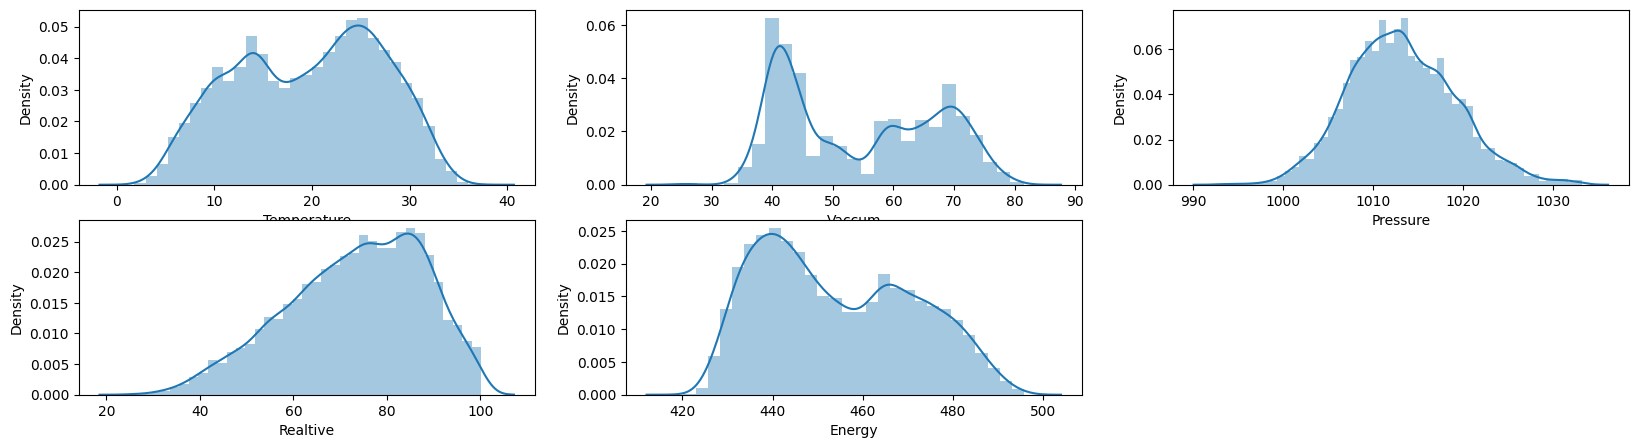

In [23]:
# Distribution of data points
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
sns.distplot(x=df['Temperature'])
plt.xlabel('Temperature')

plt.subplot(2,3,2)
sns.distplot(x=df['Vaccum'])
plt.xlabel('Vaccum')

plt.subplot(2,3,3)
sns.distplot(x=df['Pressure'])
plt.xlabel('Pressure')

plt.subplot(2,3,4)
sns.distplot(x=df['Realtive Humidity'])
plt.xlabel('Realtive')

plt.subplot(2,3,5)
sns.distplot(x=df['Energy'])
plt.xlabel('Energy')

plt.show()

<Axes: >

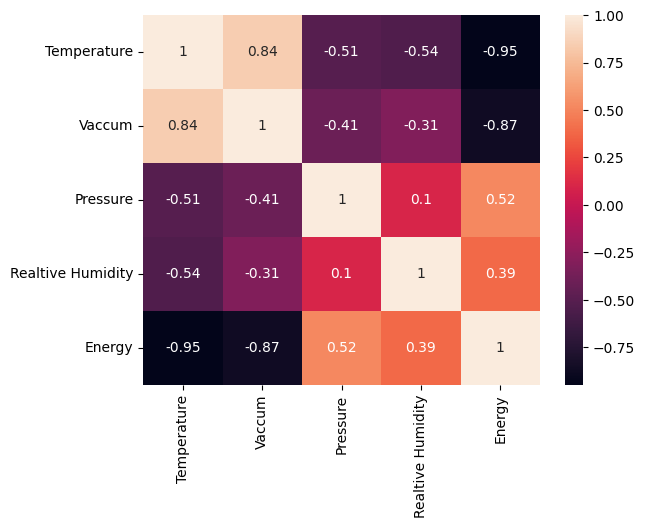

In [24]:
#Corrleation matrix
sns.heatmap(df.corr(),annot=True)

<Figure size 1000x200 with 0 Axes>

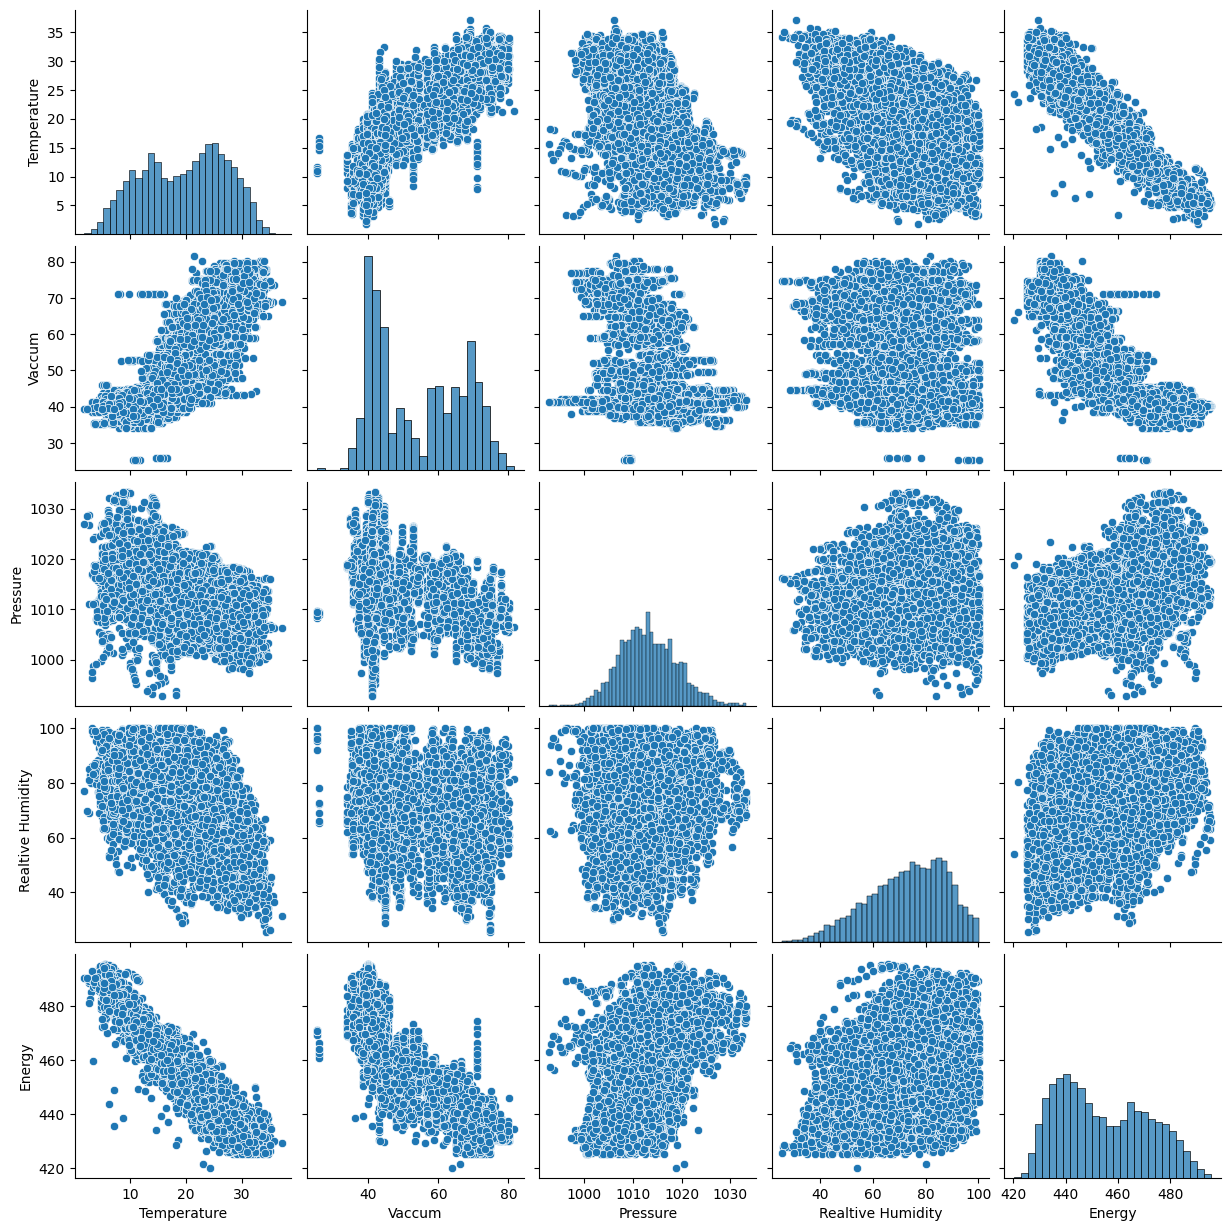

In [65]:
sns.pairplot(df)
plt.show()

In [27]:
X=df.drop('Energy', axis=1)
y=df['Energy']

In [30]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


In [48]:
!pip install scikeras
from keras.models import Sequential
from keras.layers import Dense

In [37]:
#Designing Neural Networks
model=Sequential() #Initializing the ANN
model.add(Dense(input_dim=4, units=6, activation='relu', kernel_initializer='uniform')) # Adding the input layer and first hidden layer
model.add(Dense(units=6, activation='relu', kernel_initializer='uniform')) #Adding 2nd hidden layer
model.add(Dense(units=1, activation='relu', kernel_initializer='uniform')) #adding the output layer
model.compile(optimizer='adam', loss='mean_squared_error') #Compiling the ANN

In [38]:
#Training ANN model on training set
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 174286.4688
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 439.0383
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 405.4181
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 393.0710
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 359.8365
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 339.3580
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 303.4303
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 270.4022
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 242.9379
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 207.6730
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 182.6723
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 158.2299
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 128.7907
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 109.4589
Epoch 15/100

In [39]:
#Prediction
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [43]:
#Evalution
from sklearn.metrics import mean_squared_error, r2_score
print('MSE for Train data:', mean_squared_error(y_train, y_pred_train))
print('MSE for Test data:', mean_squared_error(y_test, y_pred_test))
print('-------------------------------------------')
print('R2 score for Train data:', r2_score(y_train, y_pred_train))
print('R2 score for Test data:', r2_score(y_test, y_pred_test))

MSE for Train data: 25.98961981049493
MSE for Test data: 24.891016383066546
-------------------------------------------
R2 score for Train data: 0.9106651585586636
R2 score for Test data: 0.914898968908176
